## Работа 1.2
## Исследование эффекта комптона

**Цель работы:** Исследовать энергетический спектр γ-квантов с помощью сцинтилляционного спектрометра,
рассеянных на графите. Определить энергию рассеянных γ-квантов в зависимости от угла
рассеяния, а также энергия покоя частиц, на которых происходит комптоновское рассеяние.



### Теоретическая часть.
Изменение длины волы рассеянного излучения: 
    \begin{gather} \Delta \lambda = \lambda_1 - \lambda_0 = \frac{h}{mc}(1-\cos{\theta}) = \Lambda_k(1-\cos{\theta}), \end{gather}
    где $\lambda_1, \lambda_2$ - длины волн $\gamma$ - кванта. 
<br> Тоже самое через энергию $\gamma$ - квантов:
    $$\frac{1}{\varepsilon(\theta)} - \frac{1}{\varepsilon_0} = 1-\cos{\theta}$$
    Здесь $\varepsilon_0 = E_0/(mc^2)$ - энергия падающих $\gamma$ - квантов, $\varepsilon(\theta)$ - испытывающих комптоновское рассеяние. 
<br> Запишем через каналы:
    $$\frac{1}{N(\theta)} - \frac{1}{N_0} = A(1-\cos{\theta}).$$
    
<br> Возвращаясь к энергии и подставляя $\theta = 90°$ получаем: 
    $$mc^2(\frac{1}{E(90)} - \frac{1}{E(0)}) = 1 $$
<br> или 
 $$ mc^2 = E_{\gamma} \frac{N(90)}{N(0) - N(90)},$$
где $E(0) = E_{\gamma} -- энергия $\gamma$ - лучей, испускаемых источником.
<img src="./scheme.png"/>

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

In [90]:
def linear(coeffs, x):
    return coeffs[0] * x + coeffs[1]
def loss(coeffs):
    return sum((linear(coeffs, x_i) - y_i)**2 for x_i, y_i in zip(x, y))

1) Запишем результаты измерений в таблицу. Посчитаем сразу погрешность полученных величин.

In [164]:
pd.options.display.float_format = '{:,.5f}'.format
table = pd.read_excel("5.1.2.xlsx", dtype={'Theta':str, 'Channel':float})
kwargs = {"1/N" : lambda x: 1/x.N, "1-cosθ" : lambda x: 1 - np.cos(np.radians(x.θ))}
table = table.assign(**kwargs)
kwargs = {"σ(1-cosθ)" : lambda x: np.sin(np.radians(x.θ)*np.pi/180), 'σ(1/N)' : lambda x: 5/(table[['N']]**2)}
table = table.assign(**kwargs)
table

,θ,N,1/N,1-cosθ,σ(1-cosθ),σ(1/N)
0,0,862,0.00116,0.00000,0.00000,0.00001
1,10,881,0.00114,0.01519,0.00305,0.00001
2,20,755,0.00132,0.06031,0.00609,0.00001
3,30,710,0.00141,0.13397,0.00914,0.00001
4,40,652,0.00153,0.23396,0.01218,0.00001
5,50,575,0.00174,0.35721,0.01523,0.00002
6,60,508,0.00197,0.50000,0.01828,0.00002
7,70,439,0.00228,0.65798,0.02132,0.00003
8,80,398,0.00251,0.82635,0.02437,0.00003
9,90,362,0.00276,1.00000,0.02741,0.00004


2) Построим по таблице график зависимости $\frac{1}{N}$ от ($1 - \cos{\theta}$). Ожидаем увидеть зависимость $y = a + bx$.

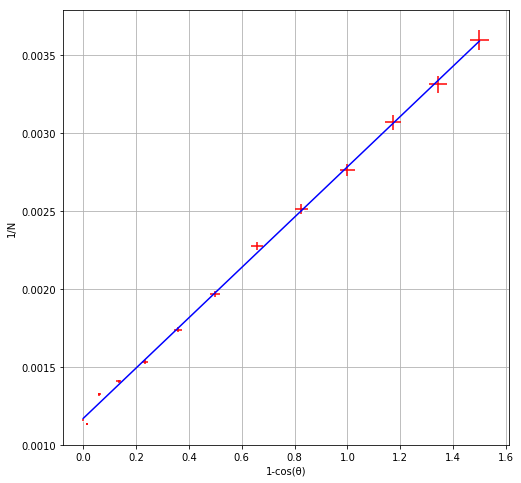

a =  0.0016116609319762817
b =  0.001171244122506826


In [178]:
%matplotlib inline
x = table['1-cosθ']
y = table['1/N']
coefs = minimize(loss, [1,1]).x

#plt.plot(x, y, 'x')
plt.figure(figsize=(8,8))
plt.subplot()
plt.errorbar(table['1-cosθ'], table['1/N'], xerr=table['σ(1-cosθ)'],
                                yerr=table['σ(1/N)'],
                                       fmt='x', color='w', ecolor='red', barsabove=True)
plt.plot(x, [linear(res.x, x_i) for x_i in x], 'b-')
plt.xlabel('1-cos(θ)')
plt.ylabel('1/N')
plt.grid()
plt.show()
print("b = ", coefs[0])
print("a = ", coefs[1])

3) С помощью графика и теоретической формулы определим энергию покоя частицы. 
<br> Известно, что $E_{\gamma} = 661.6кэВ$.

In [191]:
N_0 = 1 / coefs[1]
N_90 = 1 / (coefs[0] + coefs[1])
E = 661.6 * N_90 / (N_0 - N_90)
print("N_0 = ", N_0)
print("N_90 = ", N_90)
print("E = ", E)

N(0) =  853.7929717501503
N(90) =  359.33672921720944
E =  480.80529600001483


4) Оценим ошибку измерений:
$$ \sigma_{N_{90}} = 2.7 $$
$$ \sigma_{N_{0}} = 14.4 $$
$$ \sigma_{N_{0}} - \sigma_{N_{90}} = 15.3 $$
$$ \varepsilon_E = \sqrt{\left(\frac{\sigma_{N_{90}}}{N_{90}}\right)^2 - \left(\frac{\sigma_{N_{0}} - \sigma_{N_{90}}}{N_{0} - N_{90}}\right)^2}  = 3.9 \%$$ 

**Вывод:**  мы исследовали энергетический спектр $\gamma$ - квантов, рассеянных на графите и определлили энергию рассеяния $\gamma$-квантов в зависимости от угла рассеяния, а так же энергию покоя частиц, на которых происходит комптоновское рассеяние: $480 \pm 18$КэВ.